<a href="https://colab.research.google.com/github/ricardocarreras/Bootcamp_DataScience_student/blob/master/prediccionesTesla1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm

In [ ]:
import yfinance as yf

start="2016-01-01"

end="2022-04-01"

In [ ]:
accionesT=yf.Ticker("TSLA")

accionesT_hist=accionesT.history(period="Max")

#accionesT_hist=pd.read_csv("/content/proyectoTesla.csv")



In [ ]:
accionesT_hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


In [ ]:


#accionesT_hist["PM50"]=accionesT_hist["Close"].rolling(50).mean
#accionesT_hist["PM200"]=accionesT_hist["Close"].rolling(200).mean

#accionesT_hist["PM50"].head()

In [ ]:
accionesT_hist.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-04-08,1043.209961,1048.439941,1022.440002,1025.489990,18293300,0,0.0
2022-04-11,980.400024,1008.469971,974.640015,975.929993,19785700,0,0.0
2022-04-12,997.640015,1021.190002,976.599976,986.950012,21992000,0,0.0
2022-04-13,981.080017,1026.239990,973.099976,1022.369995,18373700,0,0.0
2022-04-14,999.289978,1012.710022,982.190002,985.000000,19444000,0,0.0


In [ ]:
#accionesT_hist.Close.rolling(50).mean

In [ ]:
# vemos que tenemos los datos hasta el día de hoy
# ahora vamos a modificar más adelante los datos para evitar un error común, que consiste en precedir algo usando en el algoritmo ese mismo dato.
# para evitarlo, tenemos que cambiar los datos de forma que usamos los datos anteriores para predecir el día posterior

In [ ]:
# Añadimos ahora los datos de la cotización del barril de petroleo BRENT

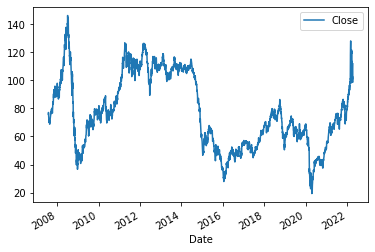

In [ ]:
cotizaciones_brent=yf.Ticker("BZ=F")

cotizaciones_brent_hist=cotizaciones_brent.history(period="Max")

cotizaciones_brent_hist.plot.line(y="Close")

In [ ]:
cotizaciones_brent_hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2007-07-30,75.849998,76.529999,75.440002,75.739998,2575,0,0
2007-07-31,75.699997,77.169998,75.669998,77.050003,3513,0,0
2007-08-01,77.000000,77.059998,74.860001,75.349998,3930,0,0
2007-08-02,75.220001,76.209999,74.269997,75.760002,6180,0,0
2007-08-03,75.389999,76.000000,74.529999,74.750000,4387,0,0


In [ ]:
# Cambiamos el nombre de la columna Close 

In [ ]:
cotizaciones_brent_hist=cotizaciones_brent_hist.rename(columns={"Close": "CloseBRENT"})

# ahora añadimos el cierre Brent a los datos de Tesla 



In [ ]:
accionesT_hist=accionesT_hist.join(cotizaciones_brent_hist["CloseBRENT"])

In [ ]:
# Importamos ahora los datos de la cotización de Bitcoin

In [ ]:
#cotizaciones_btc=yf.Ticker("BTC-USD")

#cotizaciones_btc_hist=cotizaciones_btc.history(period="Max")

#cotizaciones_btc_hist.plot.line(y="Close")

In [ ]:
#cotizaciones_btc_hist=cotizaciones_btc_hist.rename(columns={"Close": "CloseBTC"})

In [ ]:
# Unimos los datos de la cotización del bitcoin al conjunto de datos

In [ ]:
#accionesT_hist=accionesT_hist.join(cotizaciones_btc_hist["CloseBTC"])

In [ ]:
accionesT_hist.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,CloseBRENT
Date,,,,,,,,
2022-04-08,1043.209961,1048.439941,1022.440002,1025.489990,18293300,0,0.0,102.779999
2022-04-11,980.400024,1008.469971,974.640015,975.929993,19785700,0,0.0,98.480003
2022-04-12,997.640015,1021.190002,976.599976,986.950012,21992000,0,0.0,104.639999
2022-04-13,981.080017,1026.239990,973.099976,1022.369995,18373700,0,0.0,108.779999
2022-04-14,999.289978,1012.710022,982.190002,985.000000,19444000,0,0.0,111.699997


In [ ]:
# creamos los datos objetivos, que indican si ese día la acción de Tesla ha subido (1) o ha bajado(0)

In [ ]:

datosT=accionesT_hist[["Close"]]

In [ ]:
datosT=datosT.rename(columns={"Close": "Cierre Real"})

In [ ]:
datosT["target"]=accionesT_hist.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Close"]

In [ ]:
datosT.head()

,Cierre Real,target
Date,,
2010-06-29,4.778,NaN
2010-06-30,4.766,0.0
2010-07-01,4.392,0.0
2010-07-02,3.840,0.0
2010-07-06,3.222,0.0


In [ ]:
datosT.tail()

,Cierre Real,target
Date,,
2022-04-08,1025.489990,0.0
2022-04-11,975.929993,0.0
2022-04-12,986.950012,1.0
2022-04-13,1022.369995,1.0
2022-04-14,985.000000,0.0


In [ ]:
 # podemos ver que para el primer día, no hay valor, para el resto dice 1 si sube o 0 si baja ese día respecto al anterior
 

In [ ]:
# vemps que tenemos los datos hasta el día de hoy
# ahora vamos a modificar los datos para evitar un error común, que consiste en precedir algo usando en el algoritmo ese mismo dato.
# para evitarlo, usamos los datos anteriores para predecir el día posterior

In [ ]:
acciones_previas=accionesT_hist.copy()

acciones_previas=acciones_previas.shift(1)

acciones_previas.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,CloseBRENT
Date,,,,,,,,
2010-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-06-30,3.800,5.000,3.508,4.778,93831500.0,0.0,0.0,75.440002
2010-07-01,5.158,6.084,4.660,4.766,85935500.0,0.0,0.0,75.010002
2010-07-02,5.000,5.184,4.054,4.392,41094000.0,0.0,0.0,72.339996
2010-07-06,4.600,4.620,3.742,3.840,25699000.0,0.0,0.0,71.650002


In [ ]:
# ahora creamos los predictores y unimos los dos conjuntos de datos, de forma que podamos precedir el comportamiento de una fecha con datos de fechas anteriores

In [ ]:
predictores=["Close", "Open", "High", "Low", "Volume", "CloseBRENT"]

In [ ]:
datos_totales=datosT.join(acciones_previas[predictores]).iloc[1:]

In [ ]:
datos_totales.head()

,Cierre Real,target,Close,Open,High,Low,Volume,CloseBRENT
Date,,,,,,,,
2010-06-30,4.766,0.0,4.778,3.800,5.000,3.508,93831500.0,75.440002
2010-07-01,4.392,0.0,4.766,5.158,6.084,4.660,85935500.0,75.010002
2010-07-02,3.840,0.0,4.392,5.000,5.184,4.054,41094000.0,72.339996
2010-07-06,3.222,0.0,3.840,4.600,4.620,3.742,25699000.0,71.650002
2010-07-07,3.160,0.0,3.222,4.000,4.000,3.166,34334500.0,71.449997


In [ ]:
datos_totales.tail()

,Cierre Real,target,Close,Open,High,Low,Volume,CloseBRENT
Date,,,,,,,,
2022-04-08,1025.489990,0.0,1057.260010,1052.390015,1076.589966,1021.539978,26482400.0,100.580002
2022-04-11,975.929993,0.0,1025.489990,1043.209961,1048.439941,1022.440002,18293300.0,102.779999
2022-04-12,986.950012,1.0,975.929993,980.400024,1008.469971,974.640015,19785700.0,98.480003
2022-04-13,1022.369995,1.0,986.950012,997.640015,1021.190002,976.599976,21992000.0,104.639999
2022-04-14,985.000000,0.0,1022.369995,981.080017,1026.239990,973.099976,18373700.0,108.779999


In [ ]:
# analicemos estos datos

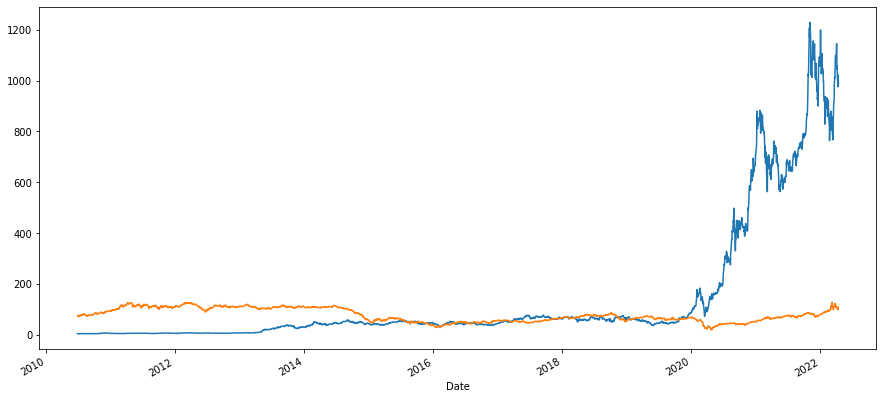

In [ ]:
datos_totales["Cierre Real"].plot(label="Cierre real", figsize=(15,7))
datos_totales["CloseBRENT"].plot(label="Cierre BRENT")

In [ ]:


datos_totales.describe()

,Cierre Real,target,Close,Open,High,Low,Volume,CloseBRENT
count,2970.000000,2970.000000,2970.000000,2970.000000,2970.000000,2970.000000,2.970000e+03,2932.000000
mean,143.424221,0.517845,143.094179,143.021321,146.190524,139.672147,3.127551e+07,76.338053
std,257.823027,0.499766,257.372358,257.290084,263.232934,250.921994,2.792568e+07,26.313533
min,3.160000,0.000000,3.160000,3.228000,3.326000,2.996000,5.925000e+05,19.330000
25%,20.171999,0.000000,20.077499,20.077500,20.620000,19.588000,1.316038e+07,54.917499
50%,46.783001,1.000000,46.726999,46.851999,47.556000,45.888000,2.485100e+07,70.599998
75%,68.399502,1.000000,68.390501,68.379503,69.487999,67.139500,3.968905e+07,105.857498
max,1229.910034,1.000000,1229.910034,1234.410034,1243.489990,1217.000000,3.046940e+08,127.980003


In [ ]:
datos_totales.corr()

,Cierre Real,target,Close,Open,High,Low,Volume,CloseBRENT
Cierre Real,1.000000,0.029941,0.999007,0.998331,0.998700,0.998760,0.083014,-0.122423
target,0.029941,1.000000,0.014541,0.015188,0.014929,0.015143,0.010901,-0.011851
Close,0.999007,0.014541,1.000000,0.999268,0.999678,0.999674,0.082912,-0.121928
Open,0.998331,0.015188,0.999268,1.000000,0.999734,0.999633,0.082079,-0.121998
High,0.998700,0.014929,0.999678,0.999734,1.000000,0.999609,0.085872,-0.121671
Low,0.998760,0.015143,0.999674,0.999633,0.999609,1.000000,0.078278,-0.121840
Volume,0.083014,0.010901,0.082912,0.082079,0.085872,0.078278,1.000000,-0.294186
CloseBRENT,-0.122423,-0.011851,-0.121928,-0.121998,-0.121671,-0.121840,-0.294186,1.000000


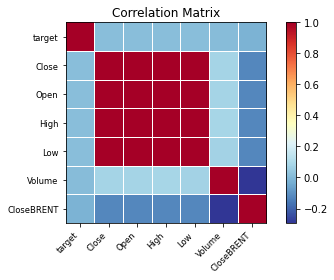

In [ ]:
correlaciones = datos_totales.set_index('Cierre Real').corr()
sm.graphics.plot_corr(correlaciones, xnames=list(correlaciones.columns))
plt.show()


In [ ]:
datos_totales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2970 entries, 2010-06-30 to 2022-04-14
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cierre Real  2970 non-null   float64
 1   target       2970 non-null   float64
 2   Close        2970 non-null   float64
 3   Open         2970 non-null   float64
 4   High         2970 non-null   float64
 5   Low          2970 non-null   float64
 6   Volume       2970 non-null   float64
 7   CloseBRENT   2932 non-null   float64
dtypes: float64(8)
memory usage: 208.8 KB


In [ ]:
# veamos ahora promedios móviles (PM) a 50 y 200 días 

#datos_totales["PM50"]=datos_totales.Close.rolling(50).mean
#datos_totales["PM200"]=datos_totales.Close.rolling(200).mean

#datos_totales["PM50"].head()

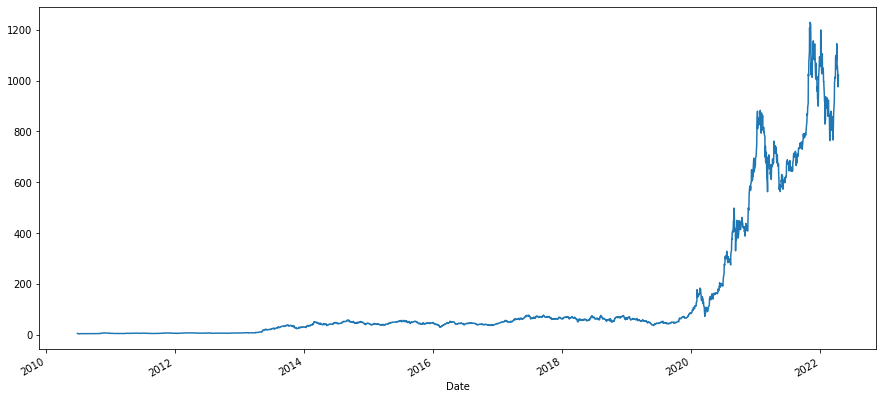

In [ ]:
datos_totales["Close"].plot(label="Close", figsize=(15,7))
#datos_totales["PM50"].plot()
#datos_totales["PM200"].plot()

In [ ]:
!pip install scikit-learn

In [ ]:
# ahora vamos a importar RandomForest para desarrollar el modelo 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model=RandomForestClassifier(n_estimators=100, min_samples_split=200, random_state=1234)

In [ ]:
# vamos primero a entrenar todos los datos excepto los 100 últimos

In [ ]:
datos_totales.head()

,Cierre Real,target,Close,Open,High,Low,Volume,CloseBRENT
Date,,,,,,,,
2010-06-30,4.766,0.0,4.778,3.800,5.000,3.508,93831500.0,75.440002
2010-07-01,4.392,0.0,4.766,5.158,6.084,4.660,85935500.0,75.010002
2010-07-02,3.840,0.0,4.392,5.000,5.184,4.054,41094000.0,72.339996
2010-07-06,3.222,0.0,3.840,4.600,4.620,3.742,25699000.0,71.650002
2010-07-07,3.160,0.0,3.222,4.000,4.000,3.166,34334500.0,71.449997


In [ ]:
#datos_totales=pd.read_csv("/content/proyectoTesla.csv")

In [ ]:
datos_totales=datos_totales.dropna() 

In [ ]:
datos_totales.head()

,Cierre Real,target,Close,Open,High,Low,Volume,CloseBRENT
Date,,,,,,,,
2010-06-30,4.766,0.0,4.778,3.800,5.000,3.508,93831500.0,75.440002
2010-07-01,4.392,0.0,4.766,5.158,6.084,4.660,85935500.0,75.010002
2010-07-02,3.840,0.0,4.392,5.000,5.184,4.054,41094000.0,72.339996
2010-07-06,3.222,0.0,3.840,4.600,4.620,3.742,25699000.0,71.650002
2010-07-07,3.160,0.0,3.222,4.000,4.000,3.166,34334500.0,71.449997


In [ ]:
train=datos_totales.iloc[:-100]
test=datos_totales.iloc[-100:]
model.fit(train[predictores], train["target"])

RandomForestClassifier(min_samples_split=200, random_state=1234)

In [ ]:
#Ahora calculamos la precisión del modelo, esto es, el número de verdaderos positivos dividido entre el 
#total de positivos, verdaderos + falsos

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

In [ ]:
preds=model.predict(test[predictores])

#lo convertimos en una serie para manejarlo mejor

preds=pd.Series(preds, index=test.index)

In [ ]:
accuracy_score(test["target"], preds)

0.49

In [ ]:
precision_score(test["target"], preds)

0.49

In [ ]:
#combinamos los datos reales y los del test

combinados=pd.concat({"target": test["target"], "predicciones": preds}, axis=1)

combinados

,target,predicciones
Date,,
2021-11-22,1.0,1.0
2021-11-23,0.0,1.0
2021-11-24,1.0,1.0
2021-11-26,0.0,1.0
2021-11-29,1.0,1.0
...,...,...
2022-04-08,0.0,1.0
2022-04-11,0.0,1.0
2022-04-12,1.0,1.0


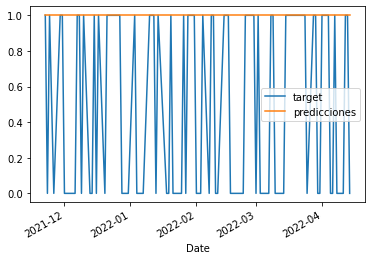

In [ ]:
combinados.plot()

In [ ]:
# Datos Históricos (Backtesting)

In [ ]:
datos_totales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2932 entries, 2010-06-30 to 2022-04-14
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cierre Real  2932 non-null   float64
 1   target       2932 non-null   float64
 2   Close        2932 non-null   float64
 3   Open         2932 non-null   float64
 4   High         2932 non-null   float64
 5   Low          2932 non-null   float64
 6   Volume       2932 non-null   float64
 7   CloseBRENT   2932 non-null   float64
dtypes: float64(8)
memory usage: 206.2 KB


In [ ]:
start=10
step=10
i=10
predicciones=[]
for i in range(start, datos_totales.shape[0], step):
  train=datos_totales.iloc[0:i].copy()
  test=datos_totales.iloc[i:i+step].copy()
  model.fit(train[predictores], train["target"])
  preds=model.predict_proba(test[predictores])[:,1]
  preds[preds>.6]=1
  preds[preds<.6]=0
  preds=pd.Series(preds, index=test.index)
  combinados=pd.concat({"target": test["target"], "predicciones": preds}, axis=1)
  predicciones.append(combinados)


predicciones=pd.concat(predicciones)

In [ ]:
predicciones["predicciones"].value_counts()

0.0    2647
1.0     275
Name: predicciones, dtype: int64

In [ ]:
precision_score(predicciones["target"], predicciones["predicciones"])

0.5309090909090909

In [ ]:
media_semanal=datos_totales.rolling(7).mean()

In [ ]:
media_mensual=datos_totales.rolling(30).mean()

In [ ]:
predicciones.head()

,target,predicciones
Date,,
2010-07-15,1.0,0.0
2010-07-19,1.0,0.0
2010-07-20,0.0,0.0
2010-07-21,0.0,0.0
2010-07-22,1.0,0.0


In [ ]:
predicciones.tail()

,target,predicciones
Date,,
2022-04-08,0.0,0.0
2022-04-11,0.0,0.0
2022-04-12,1.0,0.0
2022-04-13,1.0,0.0
2022-04-14,0.0,0.0


In [ ]:
train

In [ ]:
test